In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as srn

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/enem_dados/MICRODADOS_ENEM_2022.csv', sep = ';', encoding = 'latin-1')

In [ ]:
df

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,210057943671,2022,14,M,2,2,1,1,2,1,...,B,A,A,A,A,A,A,A,A,A
1,210057516120,2022,14,M,2,1,1,1,16,1,...,E,E,B,E,B,B,E,B,E,B
2,210057280536,2022,5,F,1,2,1,1,2,1,...,A,A,A,A,A,A,C,A,A,B
3,210055724397,2022,6,M,1,3,1,1,2,1,...,B,A,A,C,A,A,C,B,B,B
4,210055097896,2022,4,M,0,3,1,1,1,1,...,A,A,A,A,A,A,B,A,A,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3476100,210056389903,2022,3,M,1,1,1,2,0,2,...,B,A,B,B,B,A,E,A,A,B
3476101,210057205644,2022,14,F,2,1,1,2,0,2,...,A,A,A,B,A,A,C,A,B,B
3476102,210056699189,2022,2,M,1,1,1,2,0,2,...,B,A,B,C,B,A,E,A,B,B
3476103,210056983033,2022,3,M,1,3,1,2,0,3,...,B,A,B,D,A,A,E,A,B,B


In [ ]:
df.columns

Index(['NU_INSCRICAO', 'NU_ANO', 'TP_FAIXA_ETARIA', 'TP_SEXO',
       'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO',
       'CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC',
       'CO_MUNICIPIO_PROVA', 'NO_MUNICIPIO_PROVA', 'CO_UF_PROVA',
       'SG_UF_PROVA', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'TP_PRESENCA_MT', 'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC',
       'CO_PROVA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT',
       'TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH', 'TX_RESPOSTAS_LC',
       'TX_RESPOSTAS_MT', 'TP_LINGUA', 'TX_GABARITO_CN', 'TX_GABARITO_CH',
       'TX_GABARITO_LC', 'TX_GABARITO_MT', 'TP_STATUS_REDACAO',
       'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4',
       'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q001', 'Q002', 'Q003', 'Q004',

In [ ]:
df = df[['TP_FAIXA_ETARIA', 'TP_SEXO',
       'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ESCOLA',
       'SG_UF_PROVA', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT',
       'TP_LINGUA', 'TP_STATUS_REDACAO', 'NU_NOTA_REDACAO', 'Q001', 'Q002', 'Q006', 'Q025']].copy()#o que significa na integra? pra explicar

In [ ]:
df.shape

(3476105, 17)

In [ ]:
df.head(15).style.set_properties(**{'background-color': '#ffd8f6','color': '#000','border': '1px solid #000000'})

,TP_FAIXA_ETARIA,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ESCOLA,SG_UF_PROVA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_REDACAO,Q001,Q002,Q006,Q025
0,14,M,2,1,1,DF,nan,nan,nan,nan,0,nan,nan,A,A,B,A
1,14,M,1,1,1,DF,nan,nan,nan,nan,0,nan,nan,D,D,Q,B
2,5,F,2,1,1,BA,421.100000,546.000000,498.800000,565.300000,1,1.000000,760.000000,E,F,B,B
3,6,M,3,1,1,ES,490.700000,388.600000,357.800000,416.000000,1,1.000000,320.000000,C,A,A,B
4,4,M,3,1,1,PA,nan,nan,nan,nan,0,nan,nan,D,B,B,A
5,5,F,3,1,1,RJ,nan,nan,nan,nan,1,nan,nan,E,C,C,B
6,4,M,2,1,1,PE,nan,nan,nan,nan,0,nan,nan,B,B,B,B
7,6,F,2,1,1,RJ,398.100000,427.300000,400.200000,404.900000,1,1.000000,440.000000,E,E,B,B
8,8,F,3,1,1,BA,nan,nan,nan,nan,1,nan,nan,A,D,B,B
9,4,F,3,1,1,PE,467.500000,461.000000,466.700000,435.300000,1,1.000000,360.000000,E,E,B,B


In [ ]:
#transformando as variaveis numericas em nominais
mapping_dict = {1: 'Espanhol', 0: 'Inglês'}
df['TP_LINGUA'] = df['TP_LINGUA'].map(mapping_dict)
df['TP_LINGUA']

0            Inglês
1            Inglês
2          Espanhol
3          Espanhol
4            Inglês
             ...   
3476100    Espanhol
3476101    Espanhol
3476102      Inglês
3476103      Inglês
3476104    Espanhol
Name: TP_LINGUA, Length: 3476105, dtype: object

In [ ]:
grupo = df.groupby(['TP_LINGUA']).size()
grupo

TP_LINGUA
Espanhol    1576077
Inglês      1900028
dtype: int64

<Axes: xlabel='TP_LINGUA'>

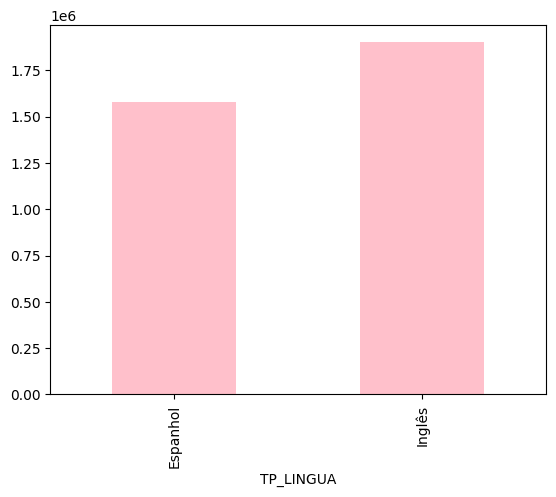

In [ ]:
grupo.plot.bar(color = 'pink')

In [ ]:
#agrupando os alunos por estado
grupo_uf = df.groupby(['SG_UF_PROVA']).size()
grupo_uf

SG_UF_PROVA
AC     22601
AL     63945
AM     80986
AP     22674
BA    265166
CE    226377
DF     65401
ES     63700
GO    141622
MA    132916
MG    309781
MS     44683
MT     59381
PA    202621
PB    103238
PE    189595
PI     84400
PR    150396
RJ    250890
RN     88049
RO     31969
RR      8434
RS    152295
SC     82791
SE     58312
SP    544442
TO     29440
dtype: int64

<Axes: xlabel='SG_UF_PROVA'>

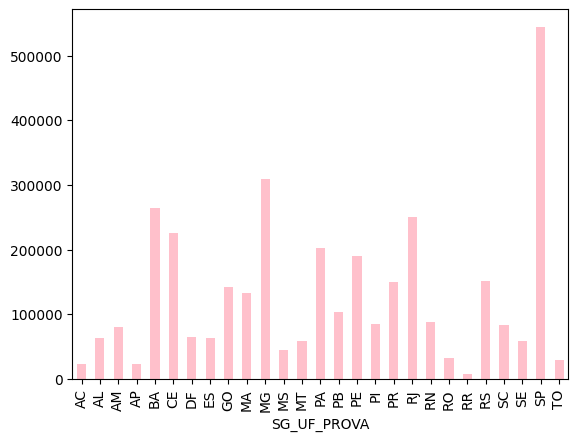

In [ ]:
#visualizando a quantidade de alunos em cada estado
grupo_uf.plot.bar(color = 'pink')

In [ ]:
grupo_sexo = df.groupby(['TP_SEXO']).size()
grupo_sexo

TP_SEXO
F    2120519
M    1355586
dtype: int64

<Axes: xlabel='TP_SEXO'>

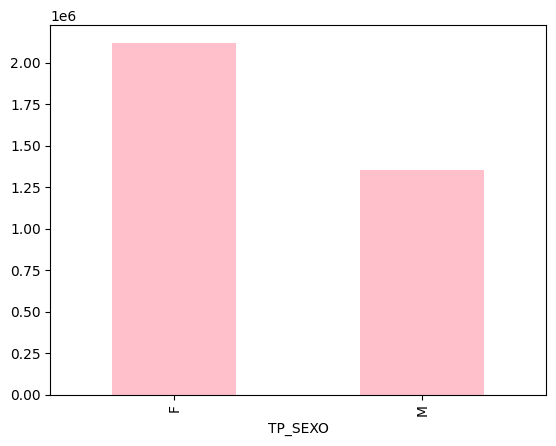

In [ ]:
grupo_sexo.plot.bar(color = 'pink')

In [ ]:
df['NU_NOTA_REDACAO'].describe()

count    2.493442e+06
mean     6.184797e+02
std      2.122125e+02
min      0.000000e+00
25%      5.200000e+02
50%      6.200000e+02
75%      7.600000e+02
max      1.000000e+03
Name: NU_NOTA_REDACAO, dtype: float64

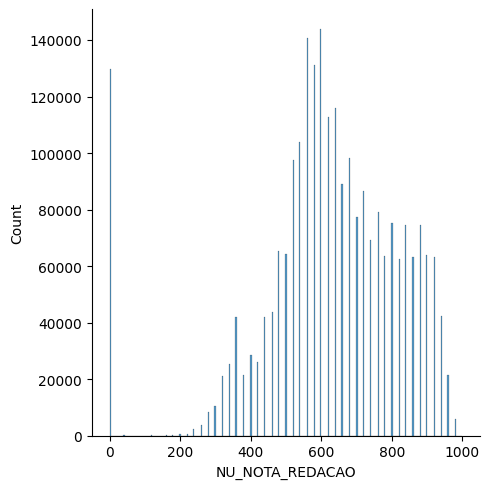

In [ ]:
srn.displot(df['NU_NOTA_REDACAO'])

In [ ]:
mapping_raca = {0: 'N/D', 1: 'Branca', 2: 'Preta', 3: 'Parda', 4: 'Amarela', 5: 'Indígena', 6: 'Não sabe'}
df['TP_COR_RACA'] = df['TP_COR_RACA'].map(mapping_raca)
df['TP_COR_RACA']


0           Preta
1          Branca
2           Preta
3           Parda
4           Parda
            ...  
3476100    Branca
3476101    Branca
3476102    Branca
3476103     Parda
3476104     Parda
Name: TP_COR_RACA, Length: 3476105, dtype: object

In [ ]:
grupo_raca= df.groupby(['TP_COR_RACA']).size()
grupo_raca

TP_COR_RACA
Amarela       66051
Branca      1428081
Indígena      19840
N/D           64867
Parda       1488844
Preta        408422
dtype: int64

<Axes: xlabel='TP_COR_RACA'>

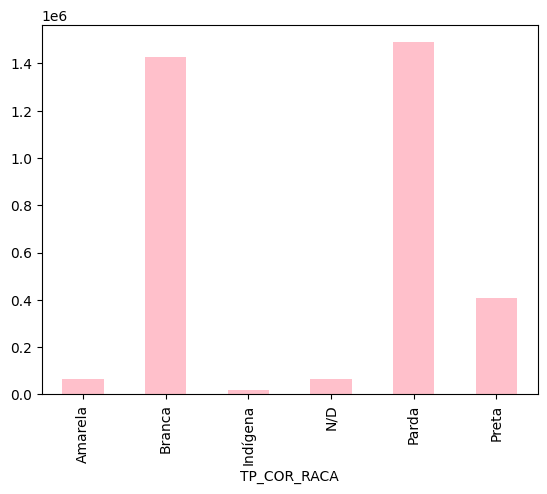

In [ ]:
grupo_raca.plot.bar(color = 'pink')

In [ ]:
print(df.dtypes['TP_FAIXA_ETARIA'])

int64


In [ ]:
#Tranformando o tipo da coluna de object para int64
df['TP_FAIXA_ETARIA'] = df['TP_FAIXA_ETARIA'].astype(int)

In [ ]:
print(df.dtypes['TP_FAIXA_ETARIA'])

int64


In [ ]:
mapping_escola = {1: 'Não respondeu', 2: 'Pública', 3: 'Privada'}
df['tipo_escola'] = df['TP_FAIXA_ETARIA'].map(mapping_escola)
df['tipo_escola']

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
            ...   
3476100    Privada
3476101        NaN
3476102    Pública
3476103    Privada
3476104    Pública
Name: tipo_escola, Length: 3476105, dtype: object

In [ ]:
grupo_escolar = df.groupby(['tipo_escola']).size()
grupo_escolar

tipo_escola
Não respondeu    303605
Privada          805862
Pública          711278
dtype: int64

<Axes: xlabel='tipo_escola'>

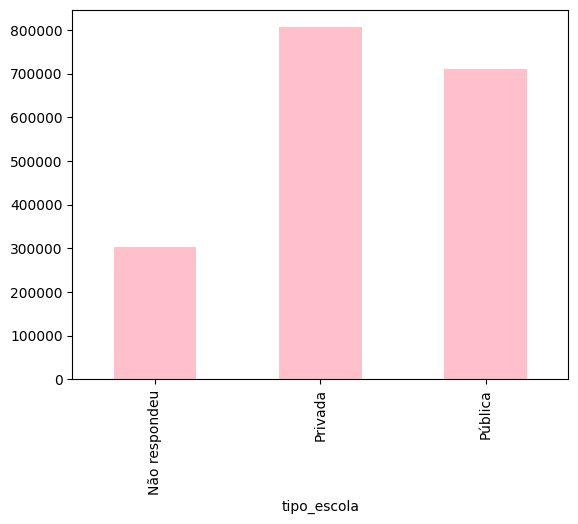

In [ ]:
grupo_escolar.plot.bar(color = 'pink')

In [ ]:
def age_mapping(age_group):
  if age_group == 1:
    return '<17'
  elif age_group == 2:
    return '17'
  elif age_group == 3:
    return '18'
  elif age_group == 4:
    return '19'
  elif age_group == 5:
    return '20'
  elif age_group == 6:
    return '21'
  elif age_group == 7:
    return '22'
  elif age_group == 8:
    return '23'
  elif age_group == 9:
    return '24'
  elif age_group == 10:
    return '25'
  elif age_group == 11:
    return '26<'
  elif age_group == 12:
    return '30<'
  elif age_group == 13:
    return '35<'
  elif age_group == 14:
    return '40<'
  elif age_group == 15:
    return '45<'
  elif age_group == 16:
    return '50<'
  elif age_group == 17:
    return '55<'
  elif age_group == 18:
    return '60<'
  else:
    return '0'

In [ ]:
df['idade_categoria'] = df['TP_FAIXA_ETARIA'].apply(age_mapping)

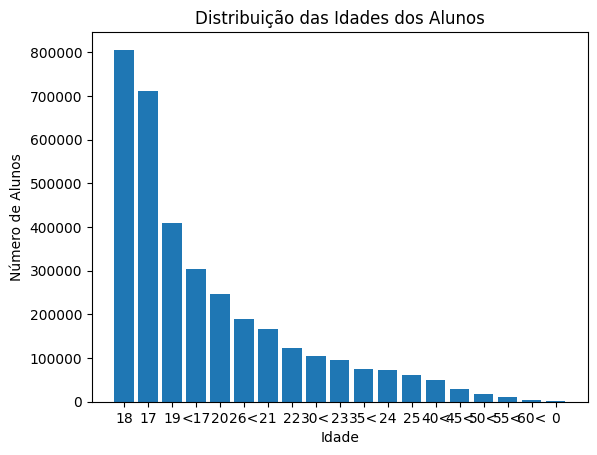

In [ ]:
idade_counts = df['idade_categoria'].value_counts()

# Criar o gráfico de barras
plt.bar(idade_counts.index, idade_counts.values)

# Adicionar rótulos e título
plt.xlabel('Idade')
plt.ylabel('Número de Alunos')
plt.title('Distribuição das Idades dos Alunos')
# If age_mapping is a DataFrame or Series, use its index
if hasattr(age_mapping, 'index'):
   plt.xticks(age_mapping.index, age_mapping['age_group'], rotation=45)


# Mostrar o gráfico
plt.show()